In [3]:
import sys
# sys.path.append('C:/Users/jabuk/PycharmProjects/')
# sys.path.append('C:/Users/jabuk/PycharmProjects/numethods/')

import tools as t
%matplotlib inline
import IPython
import sys
from numpy.polynomial import polynomial as P

import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
import math as m
import script as sc

In [4]:
def graph_values(dim, value, label='label'):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
    axes.grid(True)
    axes.set_title('Hodnota vlastního čísla')
    axes.set_xlabel(label)
    axes.set_ylabel('eigenvalue')
    for i in range(3):
        axes.plot(dim, value[i], label='$E_{}$'.format(i))
    axes.legend(loc=1)
    
def graph_time(dim, times):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
    axes.grid(True)
    axes.set_title('Časy výpočtu')
    axes.set_xlabel('k(=dim H)')
    axes.set_ylabel('t [s]')
    axes.plot(dim, times)
    
def graph_prec(dim, precision, label='label'):
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
    axes.grid(True)
    axes.set_title('Přesnost')
    axes.set_xlabel(label)
    axes.set_ylabel('t [s]')
    axes.set_yscale('log')
    for i in range(3):
        axes.plot(dim[:-1], precision[i], label='$E_{}$'.format(i))
    axes.legend(loc=3)  
    
def prec(x, value):
    precision = []
    for j in range(0,3):
        precision.append([m.fabs(value[j][i]-value[j][i+1]) for i in range(len(value[0])-1)])
    for i in range(3):
        mn=min(precision[i])
        index=precision[i].index(mn)
        
        print('E{} = {}'.format(i, value[i][index]))
        print('\t precision: {}'.format(precision[i][index]))
        print('\t for: {}'.format(x[index]))    

    return precision

In [5]:
dim=[]
value = [[],[],[]]
times = []


dim.extend([i for i in range(5, 30)])
dim.extend([i for i in range(30, 40)])
dim.extend([i for i in range(40, 50)])
dim.extend([i for i in range(50, 60)])
dim.extend([i for i in range(60, 65)])
dim.extend([i for i in range(65, 85)])

#5, 30
value[0].extend([ -0.5114039677860784, -0.6881962011133077, -0.7559584810485988, -0.7675058579879931, -0.8382131767059375, -0.8524011069940393, -0.866541764873185, -0.8958207329294681, -0.8971980138578733, -0.9093384923498574, -0.9202953733358723, -0.9203566597624465, -0.9282562373852764, -0.9314759726136267, -0.9322149051846478, -0.9362046538850587, -0.9368156000323528, -0.937701177387468, -0.9392599545807535, -0.939304399406495, -0.9398691815384362, -0.9403379470133157, -0.9403390359094843, -0.9405838759481319, -0.9406936867744023])
value[1].extend([-0.10108884207123021, -0.23190036691633983, -0.37955014566560286, -0.38973183165511305, -0.4806318441981873, -0.5804431878357853, -0.5834549650865452, -0.6422216045796578, -0.6946857383281323, -0.6947048588067374, -0.7344461171945155, -0.7569062661364592, -0.7591061803029093, -0.7840321255760072, -0.7910407146188868, -0.7955503772967882, -0.8088388387450636, -0.8100173922846158, -0.8145825418908019, -0.8202080395187731, -0.8202229145795772, -0.8232399862449289, -0.8250261731699566, -0.8251179428856265, -0.8265330416726453])
value[2].extend([ 0.1933384129609755, -0.05441469603859441, -0.13447113237970704, -0.16308647206040885, -0.2128635182219982, -0.3130674925723503, -0.3543761284142465, -0.38132053743232813, -0.46434255292206217, -0.49185407625459443, -0.5124098055681832, -0.5712298000321332, -0.5833053684678347, -0.6023571025531583, -0.6397153898983432, -0.6426324314946842, -0.6597778301186703, -0.6801232261419383, -0.680193423925708, -0.6934326045222021, -0.7021650796753328, -0.7025961989901225, -0.7107825454008625, -0.7134302691180072, -0.7144563679477742])

times.extend([0.22420024871826172, 0.26523828506469727, 0.3763389587402344, 0.4504079818725586, 0.6806519031524658, 0.7837061882019043, 1.025888442993164, 1.2751848697662354, 1.5483617782592773, 1.8836984634399414, 2.2790939807891846, 2.6423428058624268, 3.1588895320892334, 3.6122195720672607, 4.099733114242554, 4.905426740646362, 5.4168455600738525, 6.135573387145996, 6.939220190048218, 7.708991050720215, 8.520663738250732, 10.074068784713745, 10.876808881759644, 11.67957067489624, 12.733469009399414])

#30, 40
value[0].extend([-0.9407020274108973, -0.9407818626492616, -0.9408025941295207, -0.9408083336423722, -0.9408292593536961, -0.940832591294997, -0.9408347252969738, -0.9408393729237977, -0.9408398597353608, -0.940840420032321])
value[1].extend([-0.8269416837688036, -0.8270780421073313, -0.8275724020964901, -0.8276384959086875, -0.8277167013898603, -0.8278519786391331, -0.8278594939422281, -0.8278878019729683, -0.827875761670737, -0.8279190669153943])
value[2].extend([-0.7183295927166498, -0.7188161107415614, -0.7196972919059018, -0.7210730481987213, -0.7211109957966941, -0.7215577366290756, -0.721931303453121, -0.7219313036429146, -0.7220881884619283, -0.7221699150626455])

times.extend([15.99342679977417, 16.295697450637817, 18.37761116027832, 19.648684978485107, 20.417413234710693, 23.015759468078613, 25.62012553215027, 30.459455251693726, 28.4526584148407, 29.348472595214844])

#40, 50
value[0].extend([-0.9408413270996213, -0.9408414004771123, -0.9408415149285277, -0.9408416754457942, -0.9408416874628206, -0.9408417022840856, -0.8273146735875195, -0.9408417347206522, -0.8279359580933255, -0.9386574905069605])
value[1].extend([-0.8279266488007448, -0.8279327192737553, -0.827932757045984, -0.8279261373437049, -0.8279354780443843, -0.8279354811472419, -0.7024962687682503, -0.8279359573290617, -0.7222442977135105, -0.8279359542666839])
value[2].extend([-0.7221715576831471, -0.7222135584812767, -0.7222290027843121, -0.7222299899427599, -0.7222391616307368, -0.7222418596462175, -0.6237569602278419, -0.722243839154561, -0.6228784959510506, -0.722244344283644])

times.extend([31.860734939575195, 32.37319898605347, 34.832454204559326, 36.80015182495117, 39.52268695831299, 41.585466384887695, 45.397948265075684, 47.16557455062866, 49.97203588485718, 53.841596603393555])

#50, 60
value[0].extend([-0.9408417416323098, -0.9408417215743274, -0.9391461127685861, -0.94082778005218, -0.9408417425500393, -0.9408417426246006, -0.9408417195381195, -0.9371538949169959, -0.9395342176129458, -0.93993884023299])
value[1].extend([-0.8279360320237145, -0.8279360323709043, -0.8279360380997259, -0.8279360261110106, -0.7976091407912604, -0.8258203666938939, -0.8279360439165654, -0.827936043995326, -0.8279360440490203, -0.827936044126431])
value[2].extend([-0.7170449968497065, -0.7211950828076547, -0.7222416110973643, -0.7222447457910223, -0.7222447589041208, -0.7222447592001497, -0.722244764142286, -0.722244750007217, -0.7222446306123045, -0.7219386669170418])

times.extend([60.9630241394043, 64.33898735046387, 67.4839026927948, 76.35259556770325, 75.03968000411987, 79.22141647338867, 78.03241395950317, 84.59326148033142, 87.17262125015259, 92.72767162322998])

#60, 65
value[0].extend([-0.9408417425780885, -0.9408417426415883, -0.9408417426422176, -0.9408417426441978, -0.9408417425892444])
value[1].extend([-0.827936044137155, -0.8279360441383729, -0.8279360441510883, -0.8279360437291781, -0.827936044400738])
value[2].extend([-0.7222612174309979, -0.7207861239323643, -0.7247622419037298, -0.7188115142123604, -0.722139554037085])

times.extend([101.39545035362244, 102.36235904693604, 109.05732870101929, 116.7943754196167, 123.49834728240967])

#65, 70
value[0].extend([-0.9408417426393767, -0.9408417420673475, -0.9408417426316933, -0.9408417425986999, -0.9408417426414091])
value[1].extend([-0.8279354827808841, -0.8279359418224639, -0.8279360384772234, -0.8279360441169284, -0.8279360440920601])
value[2].extend([-0.6237678662500926, -0.7216322937506372, -0.7217985844772448, -0.7222269181138378, -0.7220973990814932])
#70, 80
value[0].extend([-0.9408417426447673, -0.9408417426425907, -0.9408417426404262, -0.94084174264882, -0.9408417426688678, -0.9408417426402985, -0.9408417250641968, -0.9408417425592519, -0.9408418309074723, -0.940841740336634])
value[1].extend([-0.8279360441268774, -0.8279360441592244, -0.8279360441810125, -0.827936044159096, -0.8279360440099226,-0.8279360442019226, -0.8279360434127002, -0.8279360440717427, -0.8279361175142692, -0.8279360442114264])
value[2].extend([-0.7221667086199262, -0.722220781898548, -0.7222371030035162, -0.7222437031133044, -0.7222442222233012,-0.7222390519946735, -0.7222436243195345, -0.722244352260655, -0.7222445975336, -0.7222447655686408])
#80, 85
value[0].extend([-0.9408417425541822, -0.9408417425433416, -0.940841742653074, -0.9408416881424406, -0.9408417045989396])
value[1].extend([-0.8279360442463364, -0.8279360441481339, -0.8279360442744407, -0.827936044186566, -0.82793604409506])
value[2].extend([-0.7222438324352467, -0.7222451090314284, -0.7222444279989036, -0.7222434199386077, -0.7222446155829941])
#65, 85
times.extend([145.78466939926147, 136.9395079612732, 132.71674132347107, 150.88863229751587, 148.1356863975525, 165.42920446395874, 157.24586176872253, 184.79063034057617, 186.9203474521637, 233.19443249702454, 209.69795966148376, 202.5594356060028, 218.89002919197083, 218.57826328277588, 219.39454174041748, 277.0808045864105, 222.84201765060425, 262.24757146835327, 250.44588327407837, 250.6600785255432])

# Numerické metody, úkol č. 8

`Nalezněte energie prvních tří vázaných stavů diagonalizací matice Hkl vhodnou numerickou
metodou. Jaká je chyba vámi obdržených hodnot? Pokuste se to zjistit systematickou změnou
parametrů a, b, počtu kvadraturních bodů a počtu prvků báze (rozměr matice H). Výsledkem
úlohy budou tři čísla a odhad jejich chyby.`


# Výsledky

## Celkový výsledek
Pro   
>`k = 71
a = -3
b = 5
N = 500 (integrace)
n = 2000 (LU iterace)`

E1 = -0.9408417426425907  
* přesnost: 2.164490808809205e-12 

E2 = -0.8279360441592244    
* přesnost:  2.1788126858268697e-11  

E3 = -0.722220781898548    
* přesnost: 1.6321104968186617e-05  



## Přesnost v závislosti na rozměru matice H

_V této sekci se při výpočtu mění pouze rozměr matice H_

> `value = list` obsahuje pole s hodnotami dané energie pro různý rozměr matice H    
>`times = list` pole časů výpočtů

### Vývoj hodnoty vlastního čísla

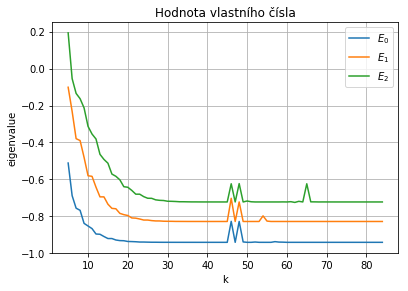

In [6]:
graph_values(dim, value,'k')

### Časová náročnost výpočtu

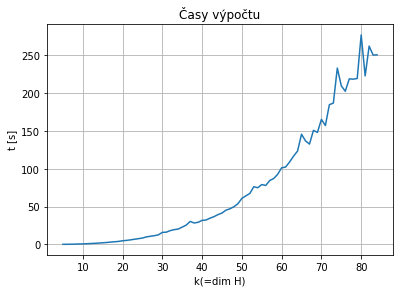

In [8]:
graph_time(dim, times)

### Přesnost

E0 = -0.9408417426415883
	 precision: 6.293854326600012e-13
	 for: 61
E1 = -0.827936044137155
	 precision: 1.2178036357113342e-12
	 for: 60
E2 = -0.721931303453121
	 precision: 1.8979362526039267e-10
	 for: 36


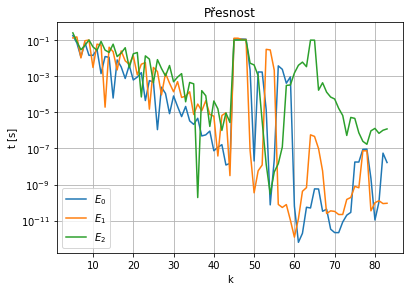

In [11]:
precision=prec(dim, value)
graph_prec(dim, precision, 'k') 

In [14]:
value_iv=[[], [], []]
times_iv=[]
dim_iv=[i/10 for i in range(-8,10)]
value_iv[0].extend([-0.940839596462475, -0.9408174554672211, -0.9407212114209579, -0.9371960004141783, -0.8521939393241323, -0.7197753750314312, -0.6217578316795053, -0.571985295766417, -0.571985295766417, -0.6217578316795053, -0.7197753750314312, -0.8521939393241323, -0.9371960004141783, -0.9407212114209579, -0.9408174554672211, -0.940839596462475, -0.9407020274108973, -0.9394706958647625])
value_iv[1].extend([-0.8279181294221576, -0.8279360045798071, -0.8246739268575625, -0.8155641547515404, -0.6919785847120693, -0.465475722490836, -0.45472522147016736, -0.37541845134519003, -0.37541845134519003, -0.45472522147016736, -0.465475722490836, -0.6919785847120693, -0.8155641547515404, -0.8246739268575625, -0.8279360045798071, -0.8279181294221576, -0.8269416837688036, -0.820548327283441])
value_iv[2].extend([-0.7220582577802339, -0.7222445994542931, -0.7217619422018976, -0.6987728248547911, -0.558351538027382, -0.4241016060563342, -0.2760001977534446, -0.09967231836839843, -0.09967231836839843, -0.2760001977534446, -0.4241016060563342, -0.558351538027382, -0.6987728248547911, -0.7217619422018976, -0.7222445994542931, -0.7220582577802339, -0.7183295927166498, -0.6962723895751141])

times_iv.extend([15.711736917495728, 21.054621696472168, 18.173834562301636, 18.336386680603027, 20.93143129348755, 16.159287691116333, 17.451812505722046, 17.264097452163696, 15.318373203277588, 14.681295156478882, 15.958500146865845, 16.925763845443726, 15.963944911956787, 15.295943975448608, 15.426481008529663, 13.741975784301758, 13.821500301361084, 13.593260049819946])


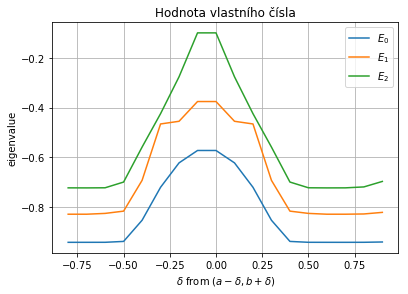

In [15]:
graph_values(dim_iv, value_iv, '$\delta$ from $(a-\delta, b+\delta)$')

E0 = -0.571985295766417
	 precision: 0.0
	 for: -0.1
E1 = -0.37541845134519003
	 precision: 0.0
	 for: -0.1
E2 = -0.09967231836839843
	 precision: 0.0
	 for: -0.1


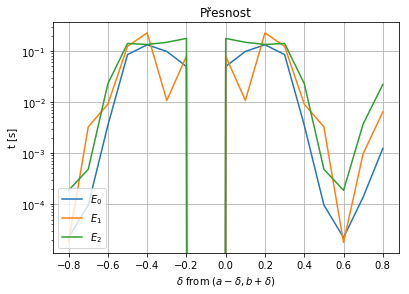

In [81]:
precision_iv=prec(dim_iv, value_iv, )
graph_prec(dim_iv, precision_iv, '$\delta$ from $(a-\delta, b+\delta)$') 

In [82]:
value_ig=[[], [], []]
times_ig=[]
dim_ig=[i+500 for i in range(0, 1500, 100)]

value_ig[0].extend([-0.9407020274108973, -0.940702027409569, -0.9407020274076658, -0.9407020274075995, -0.940702027407536, -0.9407020274074405, -0.9407020274077063, -0.9407020274076806, -0.9407020274075196, -0.9407020274074178, -0.9407020274073984, -0.9407020274074885, -0.9407020274073427, -0.9407020274070088, -0.9407020274071392])
value_ig[1].extend([-0.8269416837688036, -0.8269416837439324, -0.8269416837270016, -0.826941683721879, -0.8269416837203946, -0.8269416837203596, -0.8269416837200837, -0.8269416837200292, -0.8269416837208592, -0.8269416837200616, -0.8269416837199561, -0.8269416837200989, -0.8269416837202205, -0.8269416837196273, -0.8269416837197765])
value_ig[2].extend([-0.7183295927166498, -0.7183295926942131, -0.7183295926805576, -0.7183295926758525, -0.7183295926740824, -0.7183295926738066, -0.7183295926739823, -0.7183295926738977, -0.7183295926739525, -0.7183295926736624, -0.7183295926742437, -0.7183295926742514, -0.7183295926735646, -0.7183295926740209, -0.7183295926735757])

times_ig.extend([14.431034326553345, 15.025516271591187, 16.533910989761353, 17.148465394973755, 20.893898248672485, 22.189011812210083, 25.65417456626892, 32.10095262527466, 42.31813192367554, 36.938313722610474, 42.67052435874939, 52.97576141357422, 51.6245436668396, 59.867029428482056, 62.08297610282898])


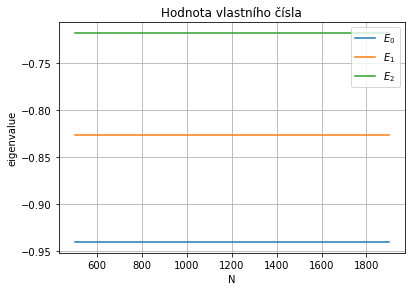

In [83]:
graph_values(dim_ig, value_ig, 'N')

E0 = -0.9407020274074178
	 precision: 1.942890293094024e-14
	 for: 1400
E1 = -0.8269416837203946
	 precision: 3.497202527569243e-14
	 for: 900
E2 = -0.7183295926742437
	 precision: 7.771561172376096e-15
	 for: 1500


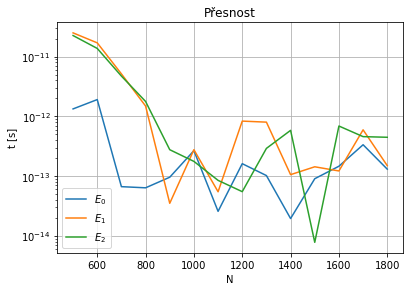

In [80]:
precision_ig=prec(dim_ig, value_ig, )
graph_prec(dim_ig, precision_ig, 'N') 